In [22]:
import pathlib
import pandas as pd
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

In [23]:
file = pathlib.Path(".") / "submission.csv"
df = pd.read_csv(file)
df

,Id,Predicted
0,a,56137 1 62467 2 68797 2 75127 2 81457 2 87786 ...


In [24]:
index = "a"
img = PIL.Image.open(pathlib.Path(".") / "test" / index / "mask.png")
img.size

(6330, 2727)

In [25]:
out_img = np.zeros((img.size[1], img.size[0], 1), dtype=np.uint8)
predicted = df["Predicted"].loc[0 if index == "a" else 1]
predicted = list(map(int, predicted.split(" ")))
starts = []
for i in range(0, len(predicted), 2):
    starts.append(i)
    start = predicted[i]
    count = predicted[i + 1]
    x1 = start % img.size[0]
    y1 = start // img.size[0]
    for i in range(count):
        assert out_img[y1, x1, 0] == 0
        out_img[y1, x1, 0] = 255
        x1 += 1
        if x1 >= img.size[0]:
            x1 %= img.size[0]
            y1 += 1

assert starts == sorted(starts)

out_img.shape, np.min(out_img), np.max(out_img)

((2727, 6330, 1), 0, 255)

In [26]:
2727 * 6330

17261910

In [27]:
np.where(out_img[:, :, 0] > 0)

(array([   8,    9,    9, ..., 2704, 2704, 2704]),
 array([5497, 5497, 5498, ..., 3645, 3646, 5542]))

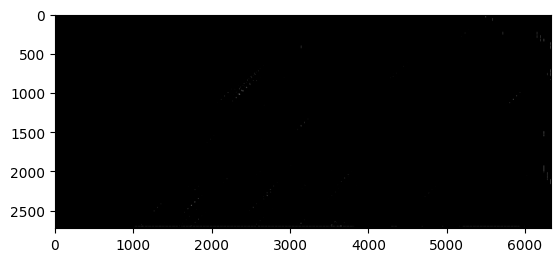

In [28]:
plt.imshow(out_img[:, :, 0], cmap="gray")